<h1>EDA (Exploratory Data Analysis)</h1>
<h3>Nama: AHMAD HAMDANI</h3>
<h3>NIM: 233307092</h3>

<h3>1. Lakukan instalasi dan library yang dibutuhkan pada praktikum ini.</h3>

Instalasi library dapat dilakukan dengan perintah `pip install` diikuti oleh nama library dan versi yang diinginkan, kemudian diverifikasi dengan mengimpor library serta mengecek versinya. Setelah di impor tampilkan versi dari library tersebut.

In [87]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from wordcloud import WordCloud

print(f"Versi pandas {pd.__version__}")
print(f"Versi numpy {np.__version__}")
print(f"Versi missingno {msno.__version__}")
print(f"Versi matplotlib {mpl.__version__}")
print(f"Versi seaborn {sns.__version__}")

Versi pandas 2.2.3
Versi numpy 2.2.3
Versi missingno 0.5.2
Versi matplotlib 3.10.1
Versi seaborn 0.13.2


<h1>Menampilkan data serta memperbaiki Missing Values</h1>

<h3>2. Deklarasikan suatu variabel untuk menampung data dari dataset `acara_tv.csv`.
setelah di simpan pada suatu variabel, tampilkan dataset tersebut menjadi dataframe.
</h3>

In [62]:
acara_tv = pd.read_csv('data/acara_tv.csv')
acara_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."



Tabel tersebut merupakan hasil dari dataset `acara_tv.csv` yang menampilkan setidaknya 8807 baris dan 12 kolom data.

<h3>3. Menampilkan informasi dan deskripsi dari dataset tersebut
</h3>

In [63]:
acara_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Panggil variabel `acara_tv` lalu tampilkan informasi dataset tersebut dengan fungsi `info()` yang akan menampilkan informasi struktur dataset dengan 8807 baris dan 12 kolom, termasuk tipe data serta jumlah nilai yang tidak kosong dari total baris data.

In [64]:
acara_tv.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Setelah itu, gunakan fungsi `describe()` untuk menampilkan ringkasan statistik yang menunjukkan distribusi tahun rilis dari 8.807 data, dengan rata-rata tahun rilis 2014,18, deviasi standar 8,82, rentang dari 1925 hingga 2021, serta mayoritas data berada antara tahun 2013 hingga 2019.

<h3>4. Menampilkan informasi jumlah baris data yang kosong (Missing Value) sesuai dengan kolom datanya.</h3>

In [65]:
acara_tv.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data tersebut menunjukkan jumlah nilai yang hilang (missing values) dalam setiap kolom, di mana kolom director memiliki data hilang terbanyak (2.634), diikuti cast (825) dan country (831), sementara kolom seperti show_id, type, title, release_year, listed_in, dan description tidak memiliki nilai yang hilang.

<h3>5. Menampilkan missing values dengan bantuan library `missingno` dan bantuan fungsi `bar()`</h3>

<Axes: >

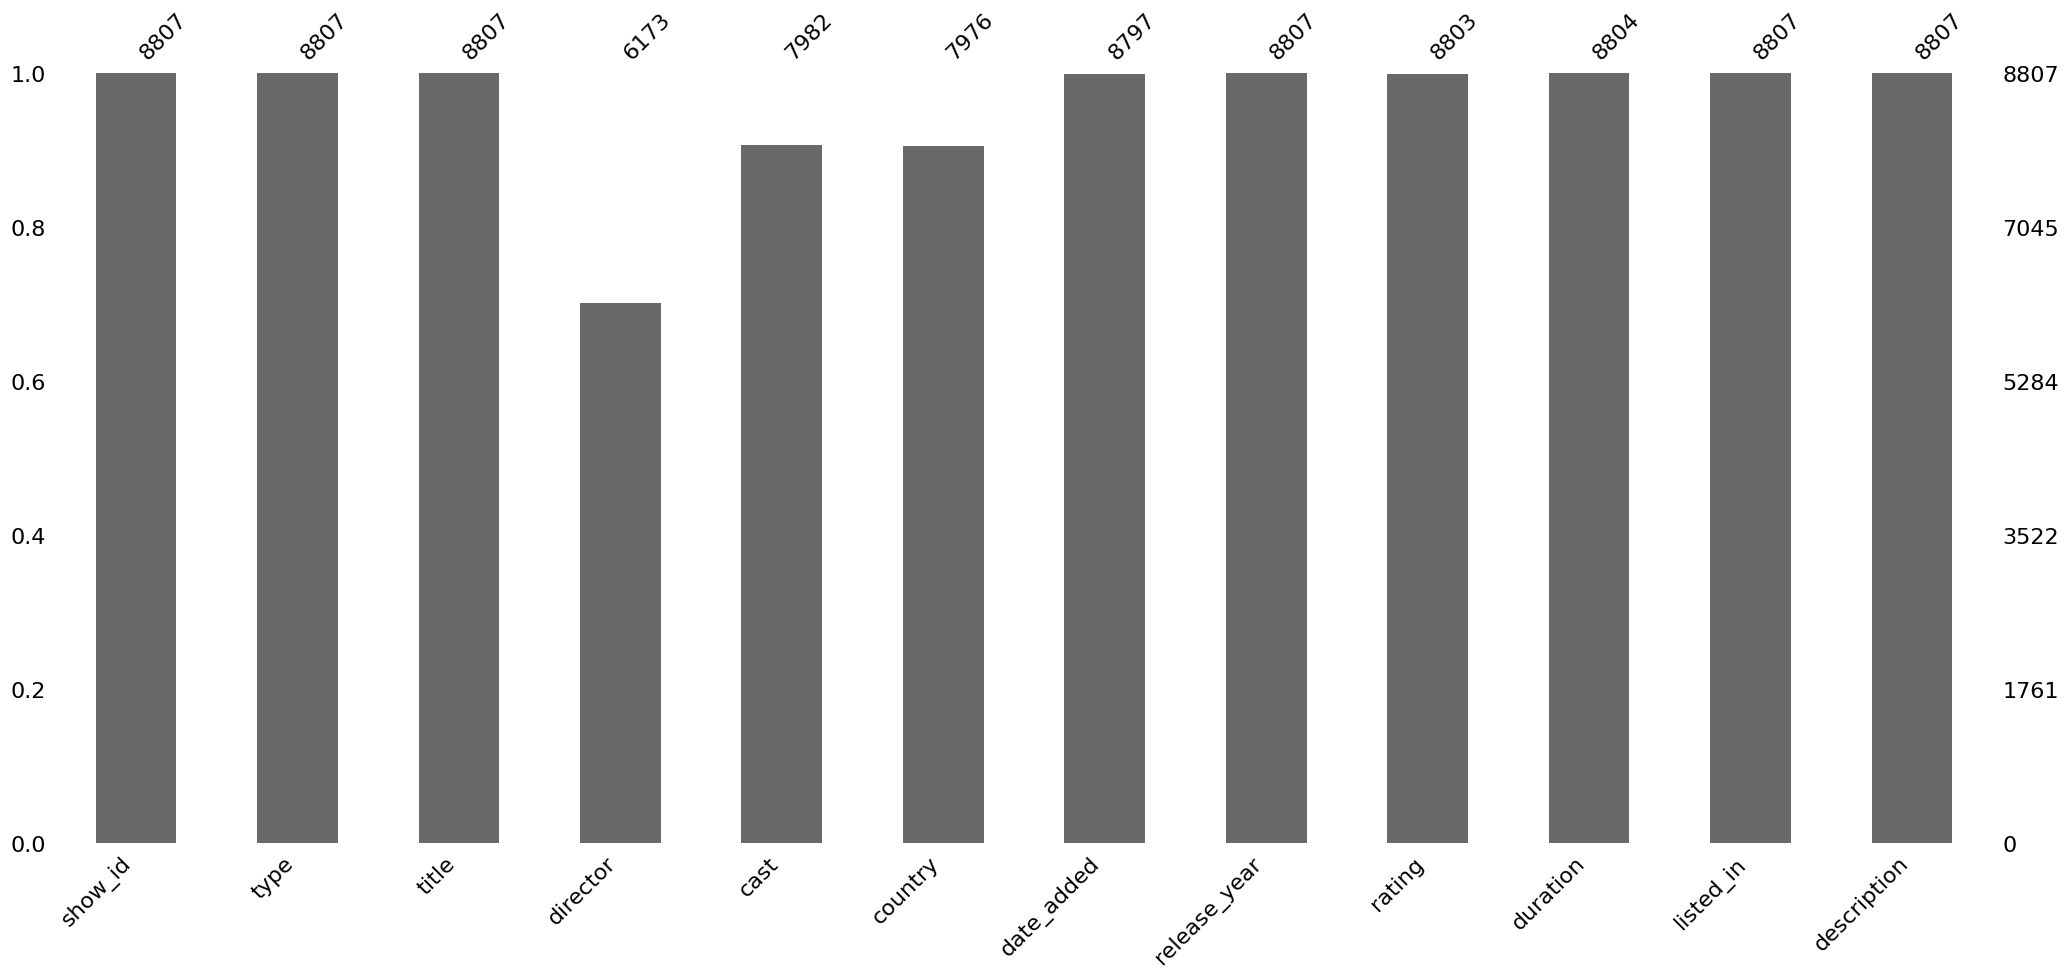

In [66]:
msno.bar(acara_tv)

Grafik tersebut menunjukkan visualisasi data yang hilang dalam dataset, di mana kolom director, cast, dan country memiliki jumlah nilai kosong yang cukup signifikan dibandingkan kolom lainnya yang hampir lengkap.

<h3>6. menggunakan fungsi matrix dari library missingno yang bertujuan mengetahui sebaran missing values pada dataframe.</h3>

<Axes: >

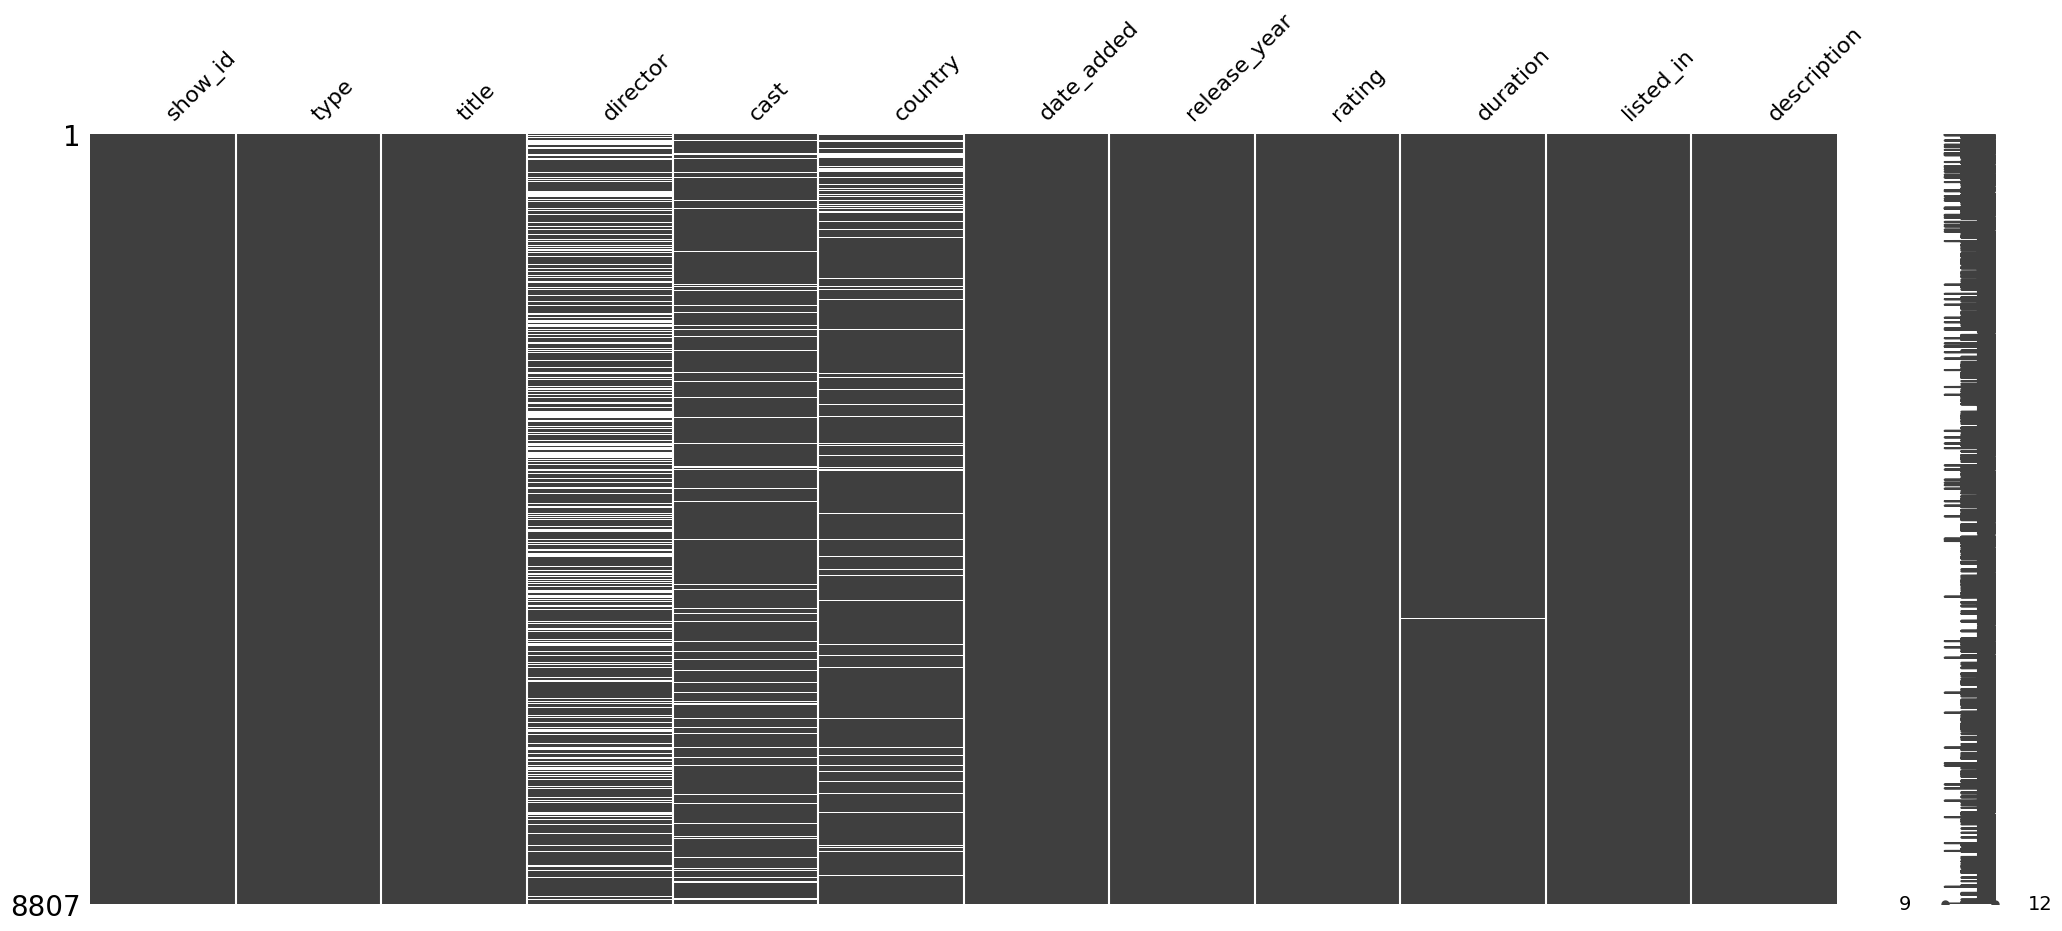

In [67]:
msno.matrix(acara_tv)

Visualisasi tersebut menunjukkan distribusi data yang hilang dalam dataset, di mana kolom director, cast, dan country memiliki banyak nilai yang hilang, sementara kolom lain seperti type, title, release_year, rating, dan description hampir tidak memiliki data yang hilang.

<h3>7. Lakukan perbaikan data missing dengan cara </h3>

In [68]:
acara_tv_imputasi = acara_tv.copy()

mean_inputer = SimpleImputer(strategy='most_frequent')
acara_tv_imputasi.iloc[:,:] = mean_inputer.fit_transform(acara_tv_imputasi)

<Axes: >

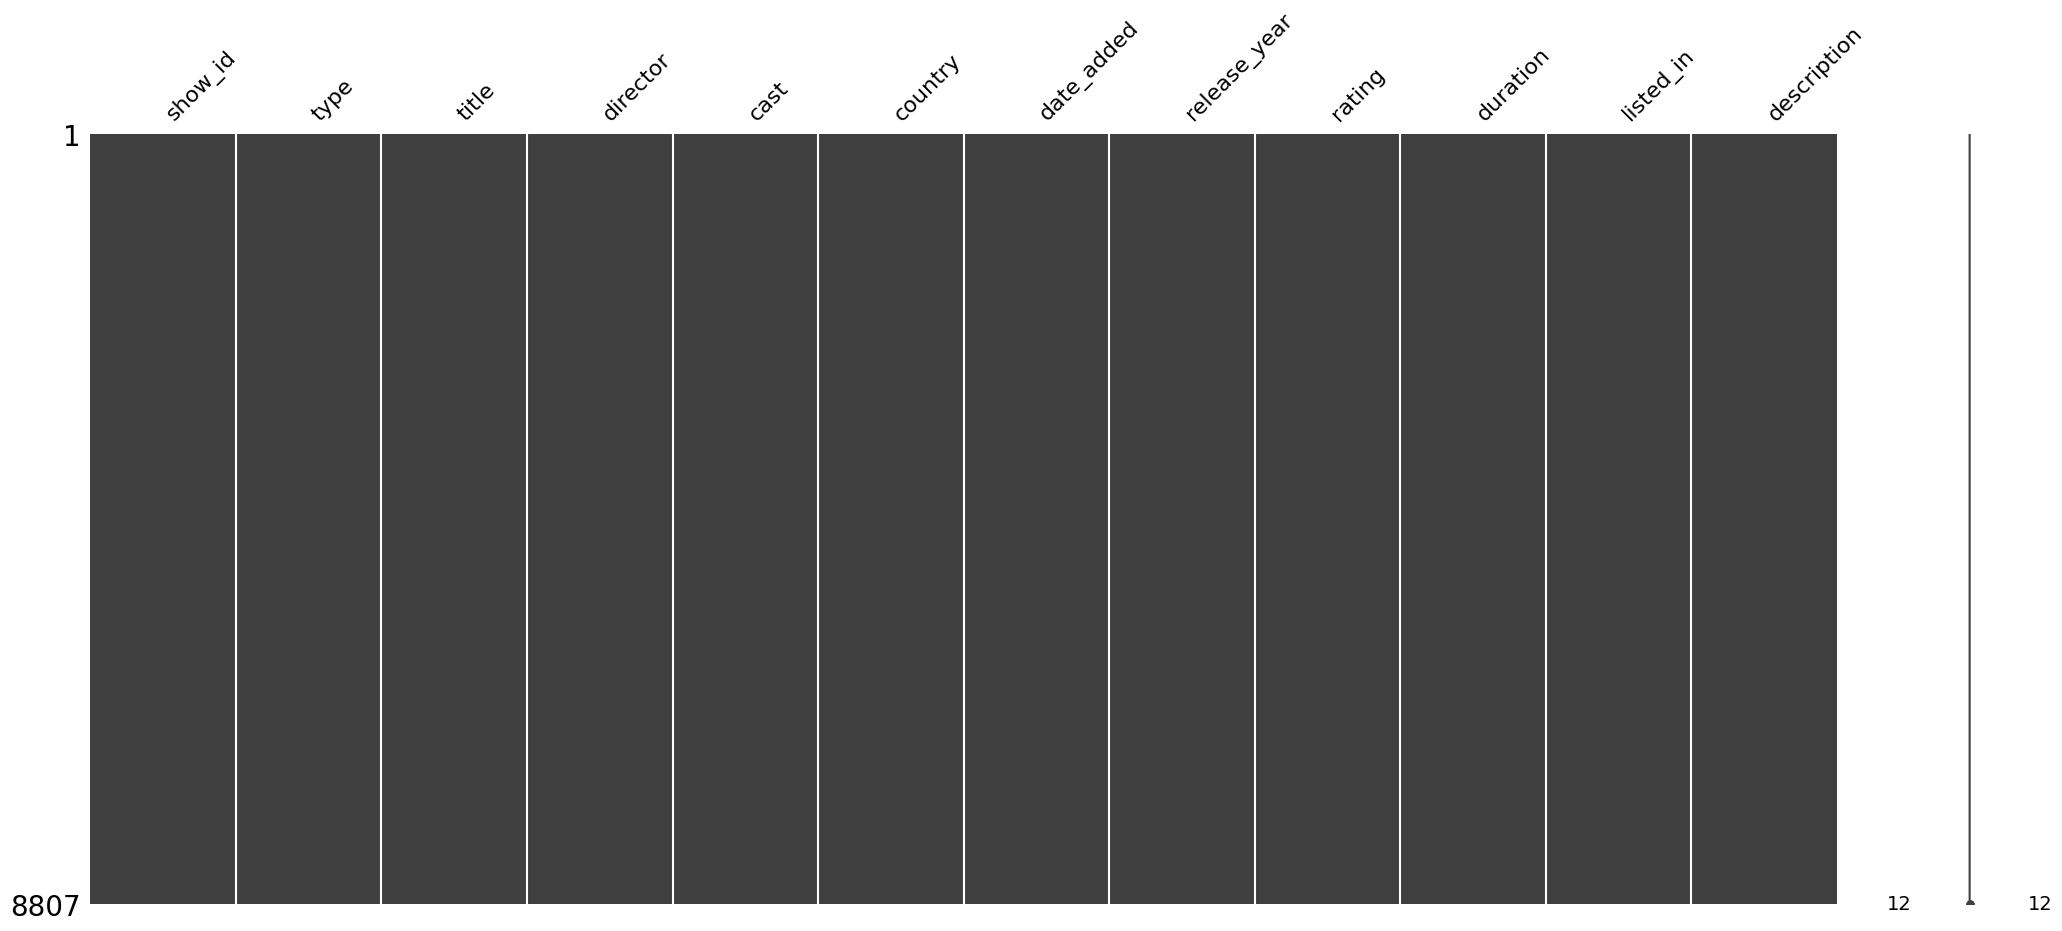

In [69]:
msno.matrix(acara_tv_imputasi)

Visualisasi tersebut menunjukkan bahwa setelah diterapkan imputasi menggunakan nilai yang paling sering muncul (most_frequent) pada dataset, tidak ada lagi data yang hilang, yang ditunjukkan oleh tidak adanya garis putih pada grafik.

<h1>Visualisasi Data</h1>

<h3>8. Menampilkan jumlah data acara tv berdasarkan type yang ada.</h3>

Fungsi `groupby(by="type")["type"].count()` mengelompokkan data berdasarkan kategori dalam kolom type lalu menghitung jumlah entri dalam setiap kelompok, sehingga menghasilkan jumlah total Movie dan TV Show dalam dataset `acara_tv_amputasi`.

In [70]:
acara_tv_imputasi.groupby(by="type")["type"].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

Kode tersebut membuat visualisasi distribusi jumlah konten berdasarkan type (Movie dan TV Show) dalam dataset `acara_tv_amputasi` menggunakan `seaborn.countplot()` dengan palet warna coolwarm untuk membandingkan jumlah masing-masing kategori secara visual.

C:\Users\ACER\AppData\Local\Temp\ipykernel_19576\2419403376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=acara_tv_imputasi, palette='coolwarm')


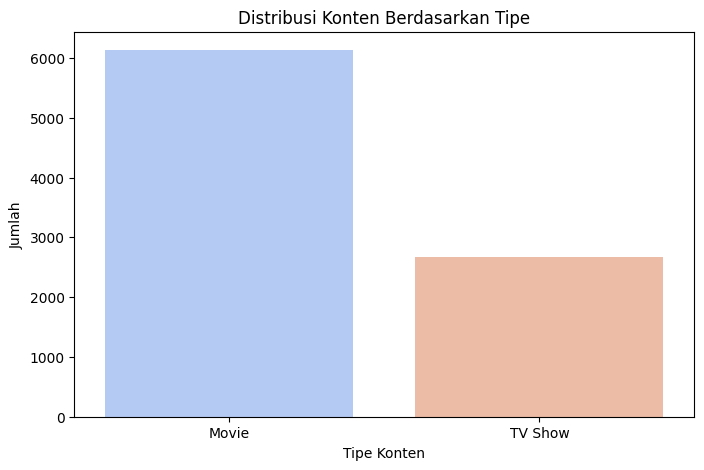

In [71]:
# Visualisasi jumlah data berdasarkan type
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=acara_tv_imputasi, palette='coolwarm')

# Menambahkan judul dan label
plt.title("Distribusi Konten Berdasarkan Tipe")
plt.xlabel("Tipe Konten")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Program tersebut menghasilkan jumlah kemunculan masing-masing tipe konten, menunjukkan bahwa Movie memiliki jumlah terbanyak (6.131), sedangkan TV Show memiliki jumlah yang lebih sedikit (2.676). Grafik batang mengonfirmasi dominasi Movie dengan proporsi lebih besar dibandingkan TV Show.

Kesimpulannya, visualisasi data ini memberikan gambaran distribusi konten berdasarkan tipe, yang dapat digunakan untuk menganalisis kecenderungan jumlah Movie dan TV Show dalam dataset.

<h3>9. Menampilkan jumlah perbandingan data berdasarkan data kolom type dengan tahun rilis pada dataset tersebut.</h3>

- Visualisasi ini menggunakan line chart untuk menampilkan tren jumlah konten berdasarkan tahun rilis dan tipe (Movie dan TV Show) setelah tahun 1980. Menampilkan data secara keseluruhan, kemudian dikelompokkan berdasarkan tahun rilis dan tipe dengan menghitung jumlahnya menggunakan `.groupby()`. Grafik dibuat menggunakan `Seaborn` dengan `sns.lineplot()`, di mana setiap titik mewakili jumlah konten pada tahun tertentu, dengan garis tren yang memperlihatkan perubahan dari waktu ke waktu.

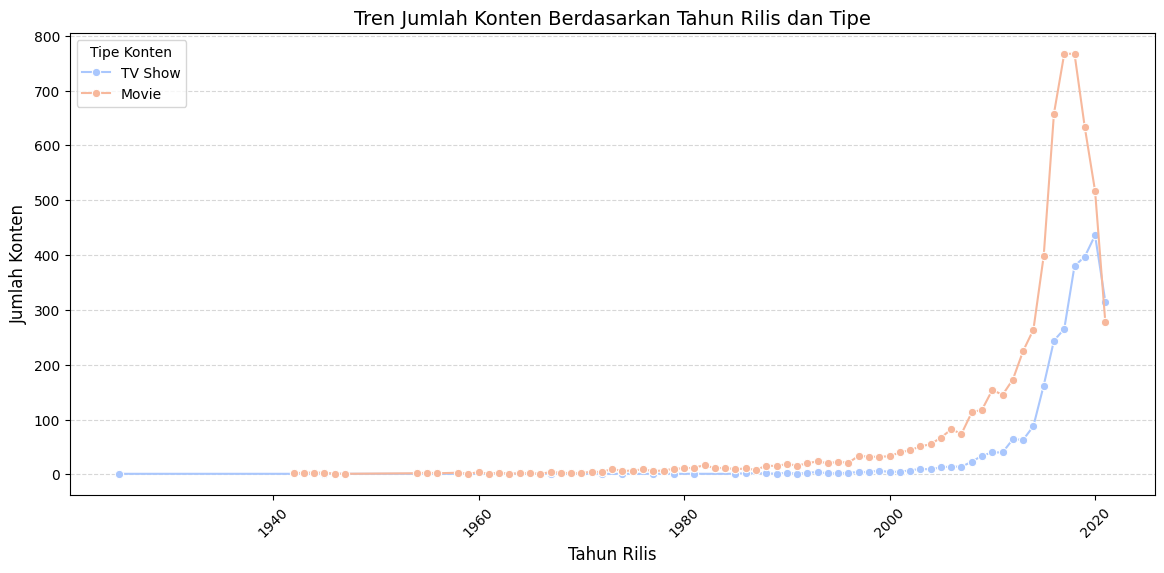

In [72]:
# Menghitung jumlah konten berdasarkan tahun dan tipe
grouped_df = acara_tv_imputasi.groupby(["release_year", "type"]).size().reset_index(name="count")

# Plot sebagai line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x="release_year", y="count", hue="type", data=grouped_df, marker="o", palette="coolwarm")

# Perbaikan tampilan
plt.title("Tren Jumlah Konten Berdasarkan Tahun Rilis dan Tipe", fontsize=14)
plt.xlabel("Tahun Rilis", fontsize=12)
plt.ylabel("Jumlah Konten", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis="y", linestyle="--", alpha=0.5) 
plt.legend(title="Tipe Konten")

# Menampilkan plot
plt.show()

- Kode dibawah ini menggunakan pustaka **pandas**, **matplotlib**, dan **seaborn** untuk mengelompokkan serta memvisualisasikan jumlah konten berdasarkan tahun rilis dan tipe (*Movie* dan *TV Show*). Fungsi `groupby()` digunakan untuk menghitung jumlah konten per tahun dan tipe, lalu `sns.lineplot()` membuat dua grafik garis yang menunjukkan tren jumlah rilis *Movie* (biru) dan *TV Show* (merah) dalam subplot vertikal, dengan tujuan menganalisis perkembangan distribusi konten dari waktu ke waktu.

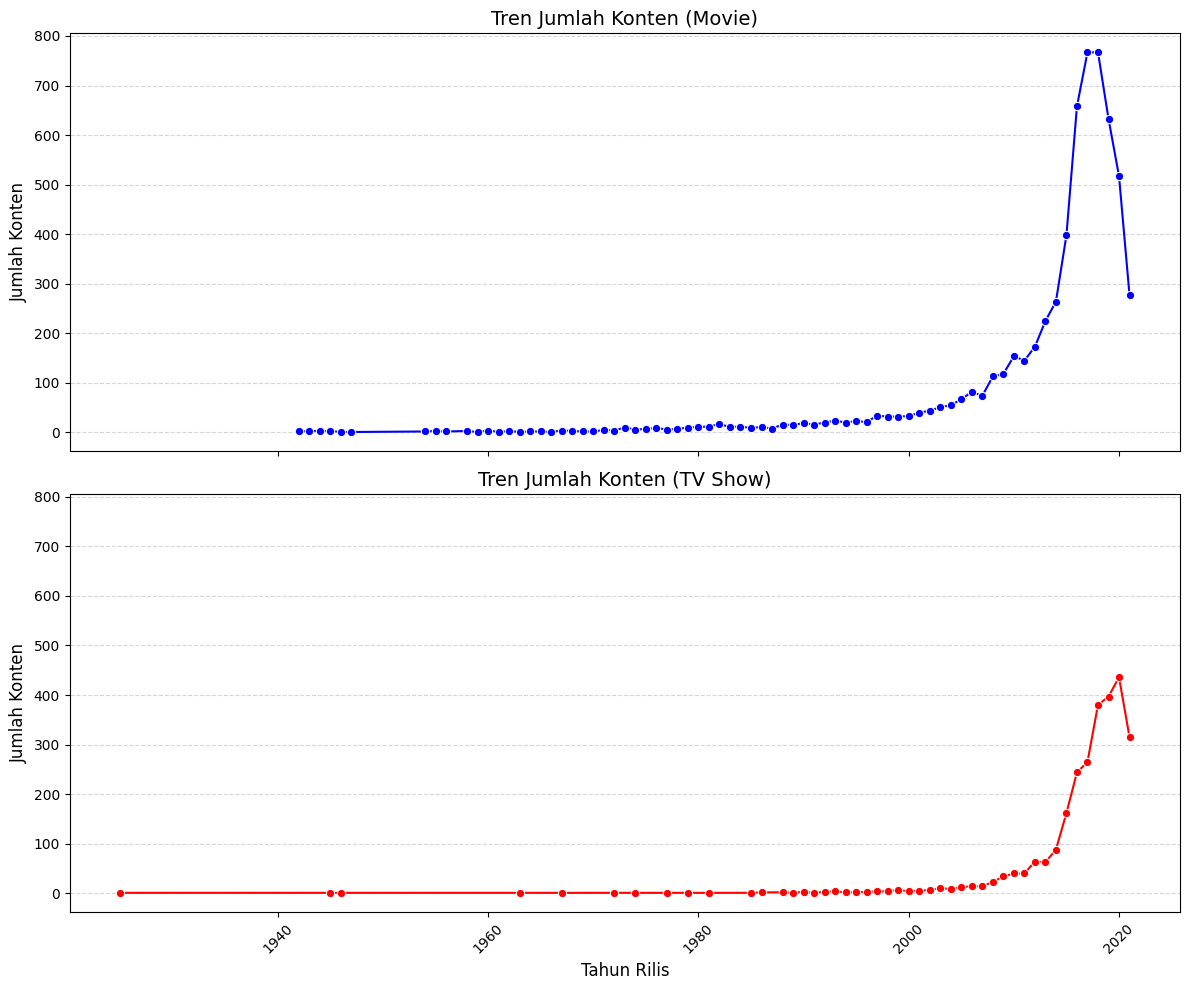

In [73]:
# Menghitung jumlah konten berdasarkan tahun dan tipe
grouped_df = acara_tv_imputasi.groupby(["release_year", "type"]).size().reset_index(name="count")

# Pisahkan data berdasarkan tipe konten
df_type_1 = grouped_df[grouped_df["type"] == "Movie"]
df_type_2 = grouped_df[grouped_df["type"] == "TV Show"]

# Membuat canvas dengan 2 subplot secara vertikal
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True, sharey=True)

# Plot untuk tipe pertama (Movie)
sns.lineplot(x="release_year", y="count", data=df_type_1, marker="o", color="blue", ax=ax1)
ax1.set_title("Tren Jumlah Konten (Movie)", fontsize=14)
ax1.set_xlabel("Tahun Rilis", fontsize=12)
ax1.set_ylabel("Jumlah Konten", fontsize=12)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Plot untuk tipe kedua (TV Show)
sns.lineplot(x="release_year", y="count", data=df_type_2, marker="o", color="red", ax=ax2)
ax2.set_title("Tren Jumlah Konten (TV Show)", fontsize=14)
ax2.set_xlabel("Tahun Rilis", fontsize=12)
ax2.set_ylabel("Jumlah Konten", fontsize=12)
ax2.grid(axis="y", linestyle="--", alpha=0.5)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Visualisasi ini menggunakan `countplot` dari `Seaborn` untuk menampilkan jumlah konten berdasarkan tahun rilis dengan membandingkan dua tipe konten menggunakan parameter `hue="type"`. Data yang di tampilkan yaitu keseluruhan data, kemudian ditampilkan dalam bar chart bertumpuk dengan palet warna coolwarm dan transparansi (alpha=0.8) untuk meningkatkan keterbacaan.

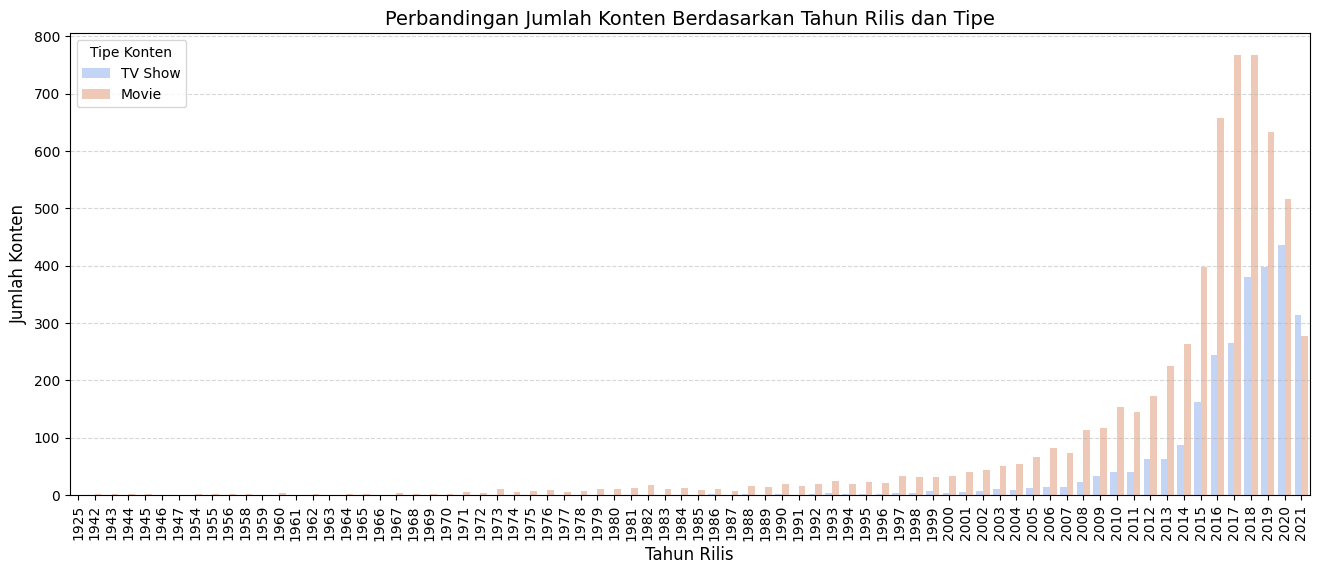

In [74]:
# Asumsikan 'acara_tv_amputasi' adalah dataframe asli
plt.figure(figsize=(16, 6))

# Visualisasi dengan countplot
sns.countplot(x="release_year", hue="type", data=acara_tv_imputasi, palette="coolwarm", alpha=0.8)

# Perbaikan tampilan
plt.title("Perbandingan Jumlah Konten Berdasarkan Tahun Rilis dan Tipe", fontsize=14)
plt.xlabel("Tahun Rilis", fontsize=12)
plt.ylabel("Jumlah Konten", fontsize=12)
plt.xticks(rotation=90) 
plt.grid(axis="y", linestyle="--", alpha=0.5) 
plt.legend(title="Tipe Konten")

# Menampilkan plot
plt.show()

Dari hasil visualisasi data di atas menunjukkan tren jumlah konten berdasarkan tahun rilis dan tipe konten (TV Show dan Movie). Dari grafik tersebut, dapat disimpulkan bahwa jumlah konten mengalami peningkatan pesat setelah tahun 2000, dengan lonjakan tertinggi terjadi sekitar tahun 2020, sebelum mengalami sedikit penurunan. ​

<h3>10. Menampilkan data jumlah rating yang dimiliki oleh setiap baris data di dataset tersebut</h3>

- Program `acara_tv_amputasi["rating"].value_counts()` menggunakan fungsi `value_counts()` dari pustaka `pandas` untuk menghitung jumlah kemunculan setiap kategori rating dalam kolom "rating" pada dataset `acara_tv_amputasi`, menghasilkan distribusi rating dengan nilai tertinggi "TV-MA" (3211) dan nilai terendah "NC-17", "UR", serta beberapa durasi menit yang tidak sesuai dengan kategori rating.

In [75]:
acara_tv_imputasi["rating"].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

- Program tersebut menggunakan pustaka `matplotlib.pyplot` untuk membuat diagram pie yang menampilkan distribusi rating konten berdasarkan jumlah data di setiap kategori rating dalam dataset `acara_tv_amputasi`, dengan fungsi `value_counts()` untuk menghitung jumlah setiap kategori, `plt.pie()` untuk membuat pie chart dengan warna dari `plt.cm.Paired.colors`, serta `plt.show()` untuk menampilkan hasil visualisasi.

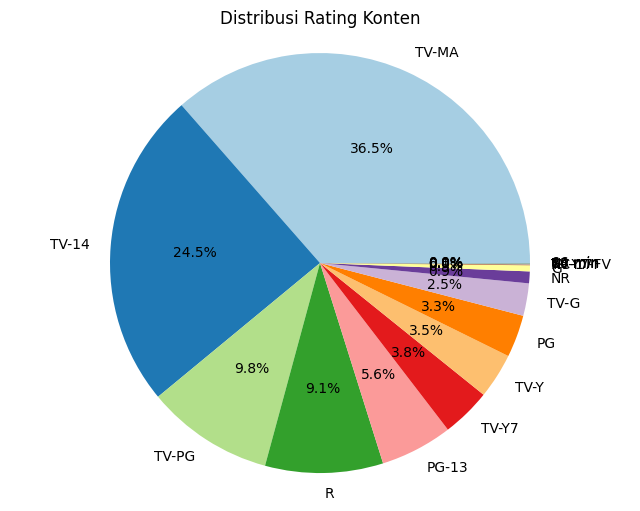

In [76]:
# Menghitung jumlah data berdasarkan kategori rating
rating_counts = acara_tv_imputasi["rating"].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Distribusi Rating Konten")
plt.axis("equal")  # Agar pie chart berbentuk lingkaran

# Menampilkan hasil
plt.show()

- Program dibawah ini menggunakan library `seaborn` dan `matplotlib.pyplot` untuk menampilkan distribusi rating konten dalam bentuk histogram, dengan `sns.histplot()` yang menampilkan jumlah setiap kategori rating secara diskrit menggunakan parameter `discrete=True`, `bins=len(rating_counts)`, serta pewarnaan `color="skyblue"`, sedangkan `plt.xticks(rotation=45)` digunakan untuk memiringkan label kategori agar lebih terbaca.

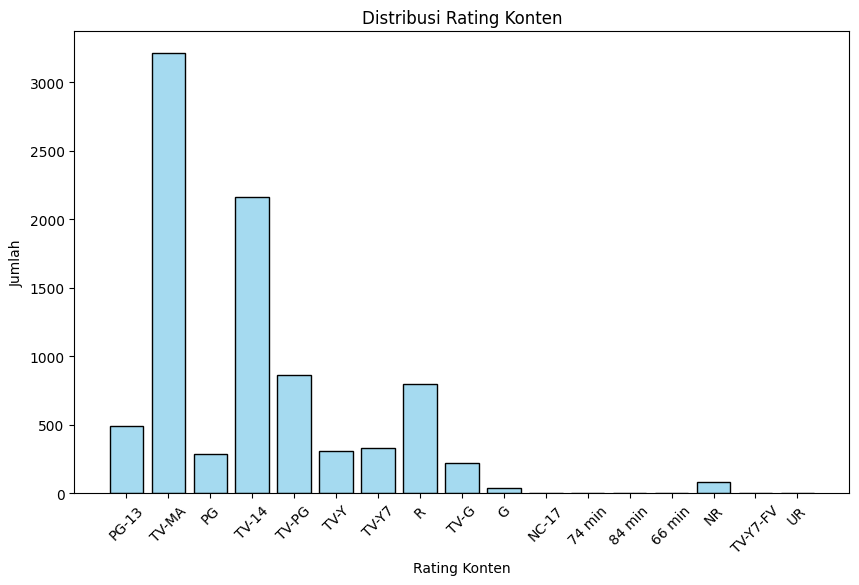

In [77]:
# Menghitung jumlah data berdasarkan kategori rating
rating_counts = acara_tv_imputasi["rating"].value_counts()

# Membuat Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=acara_tv_imputasi, x="rating", discrete=True, bins=len(rating_counts), shrink=0.8, color="skyblue")

plt.xlabel("Rating Konten")
plt.ylabel("Jumlah")
plt.title("Distribusi Rating Konten")
plt.xticks(rotation=45)  # Memiringkan label untuk keterbacaan

# Menampilkan hasil
plt.show()

Program tersebut menghasilkan jumlah kemunculan masing-masing rating konten, menunjukkan bahwa TV-MA memiliki jumlah terbanyak (3.211), diikuti oleh TV-14 (2.160) dan TV-PG (863). Grafik pie chart mengonfirmasi dominasi TV-MA dengan proporsi 36,5% dari total data.  

Kesimpulannya, visualisasi data ini menunjukkan hasil penjumlahan serta pengelompokan rating secara keseluruhan, yang digunakan untuk menganalisis seberapa banyak data yang memiliki rating yang sama.

<h3>11. Menampilkan data Acara Tv yang terbit pada setiap tahunnya dari dataset tersebut.</h3>

- Program dibawah ini menggunakan **pandas** (`value_counts()` dan `sort_index()`) untuk menghitung jumlah acara TV yang diterbitkan setiap tahun dan mengurutkannya berdasarkan tahun secara kronologis. Tujuan dari program ini adalah untuk menganalisis distribusi acara TV berdasarkan tahun terbit, sehingga dapat membantu dalam memahami tren produksi acara TV dari waktu ke waktu.

In [78]:
acara_tv_imputasi["release_year"].value_counts().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

- Program dibawah ini menggunakan **pandas** (`value_counts()` dan `sort_index()`) untuk menghitung jumlah acara TV per tahun serta **matplotlib** (`plt.bar()`, `plt.xlabel()`, `plt.ylabel()`, `plt.title()`, dan `plt.xticks()`) untuk membuat visualisasi data dalam bentuk bar chart. Tujuan dari program ini adalah menampilkan tren jumlah acara TV yang diterbitkan setiap tahun, sehingga dapat dianalisis pola produksi acara TV dari waktu ke waktu.

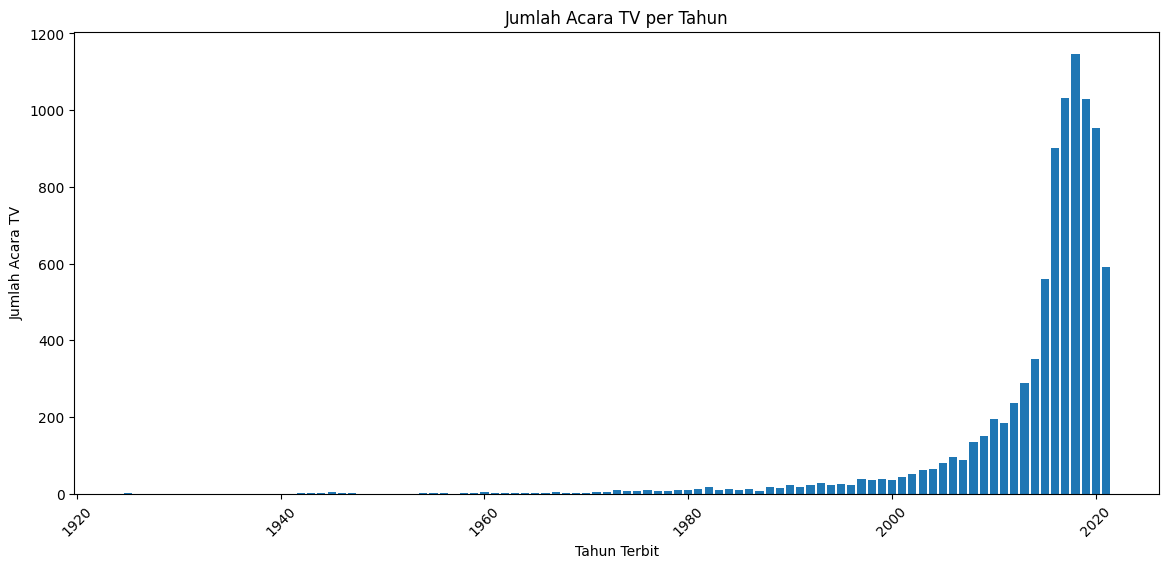

In [79]:
data_per_tahun = acara_tv_imputasi["release_year"].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(data_per_tahun.index, data_per_tahun.values)
plt.xlabel("Tahun Terbit")
plt.ylabel("Jumlah Acara TV")
plt.title("Jumlah Acara TV per Tahun")
plt.xticks(rotation=45)

plt.show()

- Program dibawah ini menggunakan **pandas** (`value_counts()`, `nlargest()`, dan `nsmallest()`) untuk menghitung jumlah acara TV per tahun dan mengekstrak 5 tahun dengan jumlah acara TV terbanyak serta tersedikit, serta **matplotlib** (`plt.subplots()`, `bar()`, `set_title()`, `set_xlabel()`, `set_ylabel()`, dan `tick_params()`) untuk menampilkan dua grafik batang dalam layout vertikal. Tujuan dari program ini adalah membandingkan tren produksi acara TV berdasarkan tahun dengan menampilkan tahun dengan produksi terbanyak dan tersedikit dalam dua visualisasi yang terpisah.

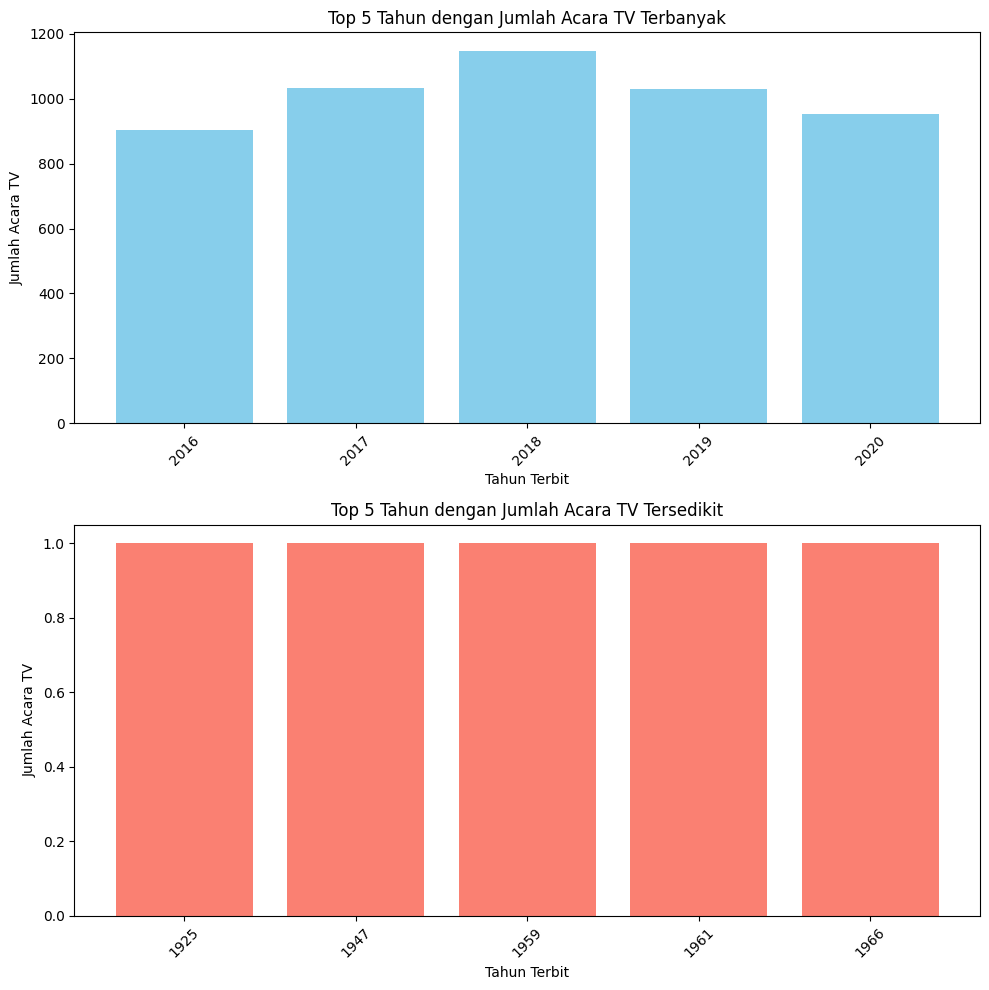

In [80]:
# Menghitung jumlah acara TV per tahun
data_per_tahun = acara_tv_imputasi["release_year"].value_counts()

# Mengambil 5 tahun dengan jumlah acara TV terbanyak
top_5_tahun = data_per_tahun.nlargest(5).sort_index()

# Mengambil 5 tahun dengan jumlah acara TV tersedikit
bottom_5_tahun = data_per_tahun.nsmallest(5).sort_index()

# Membuat subplot dengan layout vertikal (2 bar chart)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # 2 bar chart, layout vertikal

# Bar chart untuk 5 tahun dengan acara TV terbanyak
axes[0].bar(top_5_tahun.index.astype(str), top_5_tahun.values, color="skyblue")
axes[0].set_title("Top 5 Tahun dengan Jumlah Acara TV Terbanyak")
axes[0].set_xlabel("Tahun Terbit")
axes[0].set_ylabel("Jumlah Acara TV")
axes[0].tick_params(axis="x", rotation=45)

# Bar chart untuk 5 tahun dengan acara TV tersedikit
axes[1].bar(bottom_5_tahun.index.astype(str), bottom_5_tahun.values, color="salmon")
axes[1].set_title("Top 5 Tahun dengan Jumlah Acara TV Tersedikit")
axes[1].set_xlabel("Tahun Terbit")
axes[1].set_ylabel("Jumlah Acara TV")
axes[1].tick_params(axis="x", rotation=45)

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

- Program ini menggunakan **pandas** untuk menghitung jumlah acara TV per tahun, serta **matplotlib** dan **seaborn** untuk memvisualisasikan data dalam bentuk bar chart. Tujuannya adalah untuk mengidentifikasi tahun dengan jumlah acara TV terbanyak dan menampilkannya secara grafis agar pola tren dapat terlihat dengan jelas.

C:\Users\ACER\AppData\Local\Temp\ipykernel_19576\741233295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_counts, x="release_year", y="count", palette="Blues")
C:\Users\ACER\AppData\Local\Temp\ipykernel_19576\741233295.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


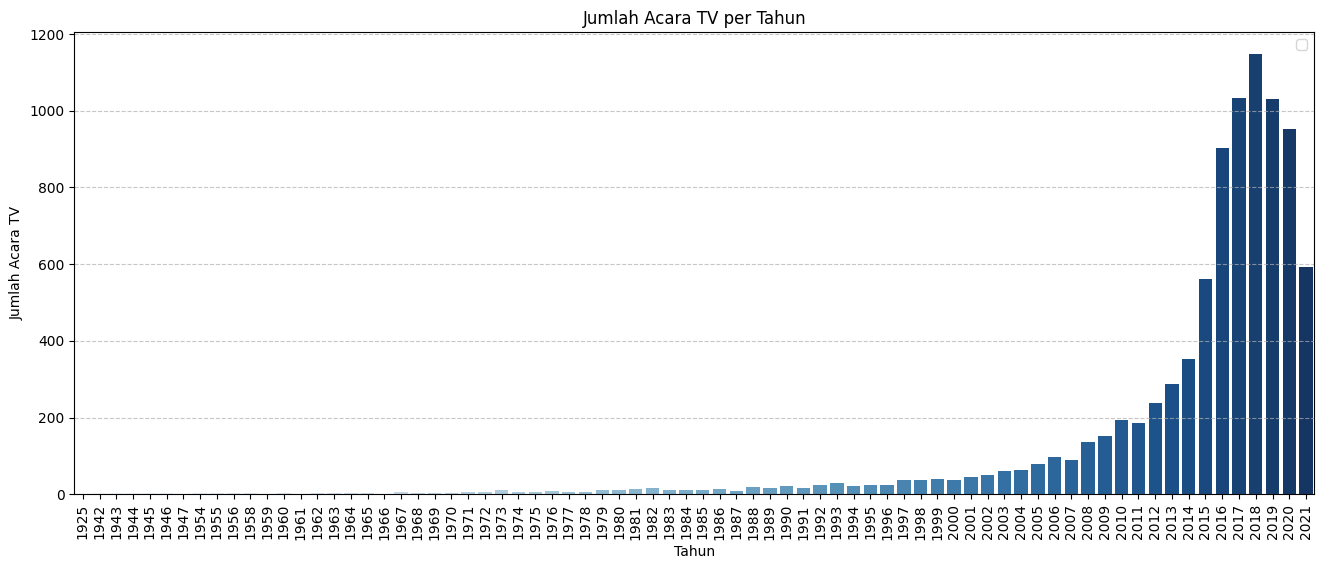

Tahun dengan jumlah acara TV terbanyak: 2018 dengan 1147 acara TV.


In [81]:
# Hitung jumlah acara TV per tahun
yearly_counts = acara_tv_imputasi['release_year'].value_counts().reset_index()
yearly_counts.columns = ['release_year', 'count']

# Temukan tahun dengan jumlah acara TV terbanyak
peak_year = yearly_counts.iloc[0]  # Baris pertama setelah sorting sudah berisi tahun dengan jumlah terbanyak

# Plot bar chart
plt.figure(figsize=(16, 6))
sns.barplot(data=yearly_counts, x="release_year", y="count", palette="Blues")

# Label dan judul
plt.xlabel("Tahun")
plt.ylabel("Jumlah Acara TV")
plt.title("Jumlah Acara TV per Tahun")
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

# Cetak tahun dengan jumlah acara TV terbanyak
print(f'Tahun dengan jumlah acara TV terbanyak: {peak_year["release_year"]} dengan {peak_year["count"]} acara TV.')

- Kode ini menggunakan **pandas** untuk memfilter data berdasarkan kolom `'type'`, lalu menghitung jumlah **TV Show** dan **Movie** per tahun menggunakan **`value_counts()`**. Visualisasi dibuat dengan **matplotlib** menggunakan **`plt.plot()`** untuk membandingkan tren produksi acara TV dan film dari waktu ke waktu, membantu dalam menganalisis perkembangan industri hiburan.

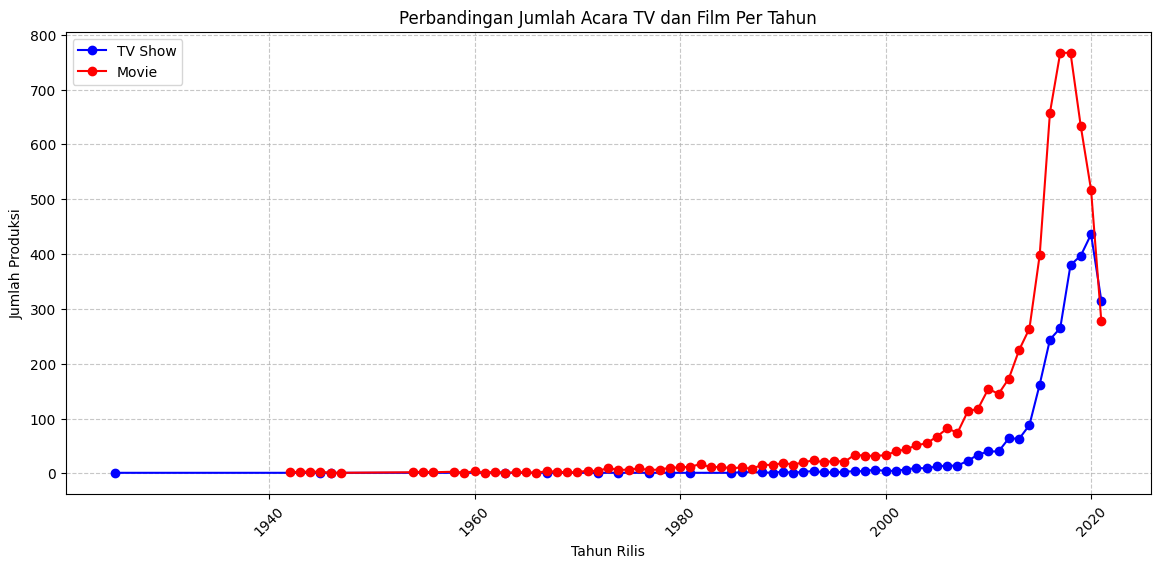

In [82]:
# Pastikan ada kolom 'type' yang membedakan antara Film dan Acara TV
if 'type' in acara_tv_imputasi.columns:
    # Hitung jumlah acara TV dan Film per tahun
    tv_counts = acara_tv_imputasi[acara_tv_imputasi['type'] == 'TV Show']['release_year'].value_counts().sort_index()
    movie_counts = acara_tv_imputasi[acara_tv_imputasi['type'] == 'Movie']['release_year'].value_counts().sort_index()

    # Plot line chart
    plt.figure(figsize=(14, 6))
    plt.plot(tv_counts.index, tv_counts.values, marker='o', linestyle='-', label='TV Show', color='blue')
    plt.plot(movie_counts.index, movie_counts.values, marker='o', linestyle='-', label='Movie', color='red')

    plt.xlabel('Tahun Rilis')
    plt.ylabel('Jumlah Produksi')
    plt.title('Perbandingan Jumlah Acara TV dan Film Per Tahun')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()


- Kode tersebut menggunakan **library Seaborn dan Matplotlib** untuk membuat **scatterplot** yang menampilkan jumlah acara TV dan film berdasarkan tahun rilis. Fungsi `groupby()` dan `size()` digunakan untuk menghitung jumlah acara per tahun dan tipe, lalu `sns.scatterplot()` digunakan untuk memvisualisasikannya dengan warna (`hue="type"`) serta ukuran titik yang menunjukkan jumlah acara (`size="count"`). **Tujuan dari kode ini** adalah untuk **melihat distribusi dan tren jumlah acara TV serta film per tahun**, sehingga dapat dianalisis apakah ada tahun-tahun tertentu dengan produksi yang lebih tinggi atau lebih rendah.

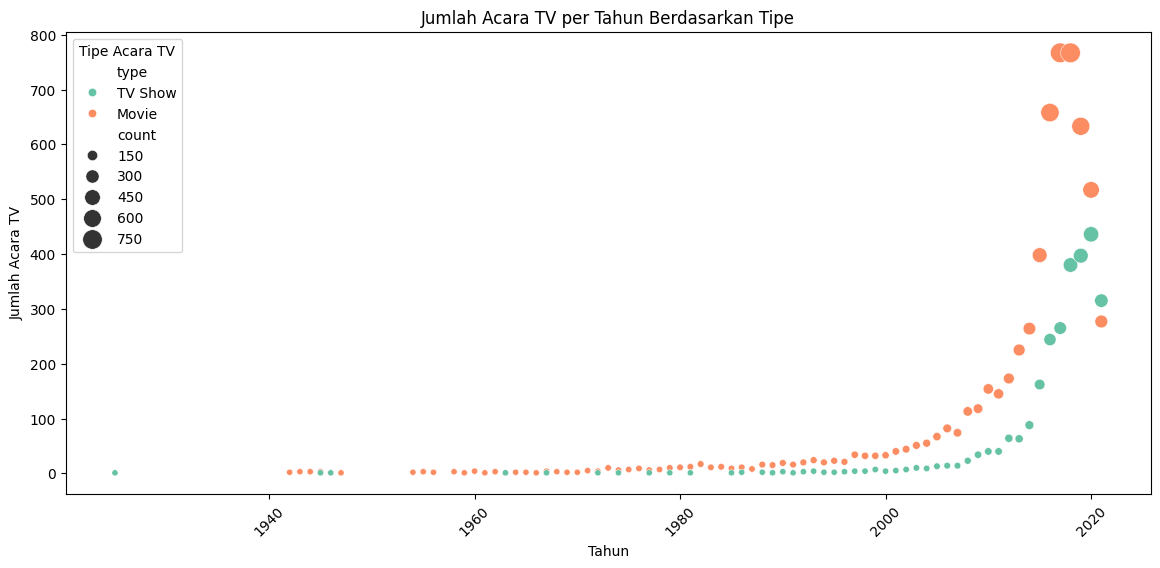

In [83]:
# Menghitung jumlah masing-masing type per tahun
yearly_type_counts = acara_tv_imputasi.groupby(['release_year', 'type']).size().reset_index(name='count')

# Membuat visualisasi menggunakan scatterplot
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=yearly_type_counts, 
    x="release_year", 
    y="count", 
    hue="type", 
    size="count", 
    sizes=(20, 200), 
    palette="Set2"
)

# Label dan judul
plt.xlabel("Tahun")
plt.ylabel("Jumlah Acara TV")
plt.title("Jumlah Acara TV per Tahun Berdasarkan Tipe")
plt.xticks(rotation=45)
plt.legend(title="Tipe Acara TV")

# Menampilkan plot
plt.show()

**Penjelasan:** Dari hasil visualisasi data di atas menampilkan data jumlah acara ty yang terbit/rilis per tahunnya mulai dari awal industri televisi, sehingga terlihat bahwa jumlah acara TV mengalami peningkatan signifikan setelah tahun 2000, mencapai puncaknya sekitar tahun 2017-2019 sebelum mengalami sedikit penurunan setelahnya. Adapun visualisasi yang menampilkan 5 data terbanyak dan tersedikit yang memiliki data acara tv yang terbit pada pada tahun tertentu.

**Kesimpulan:** Industri televisi berkembang pesat setelah tahun 2000 dengan jumlah acara yang terus meningkat hingga puncaknya pada akhir 2010-an, sebelum mengalami sedikit penurunan setelah 2020.

<h3>12. Menampilkan visualisasi data kategori listed_in dari dataset tersebut </h3>

- Program ini menggunakan **pandas** untuk memisahkan dan menghitung frekuensi kategori acara TV dari dataset tanpa `Counter`, serta **seaborn** dan **matplotlib** untuk memvisualisasikan distribusi kategori dalam bentuk barplot guna menganalisis sebaran kategori acara.

C:\Users\ACER\AppData\Local\Temp\ipykernel_19576\1893493828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_df, x='Count', y='Category', palette='magma')


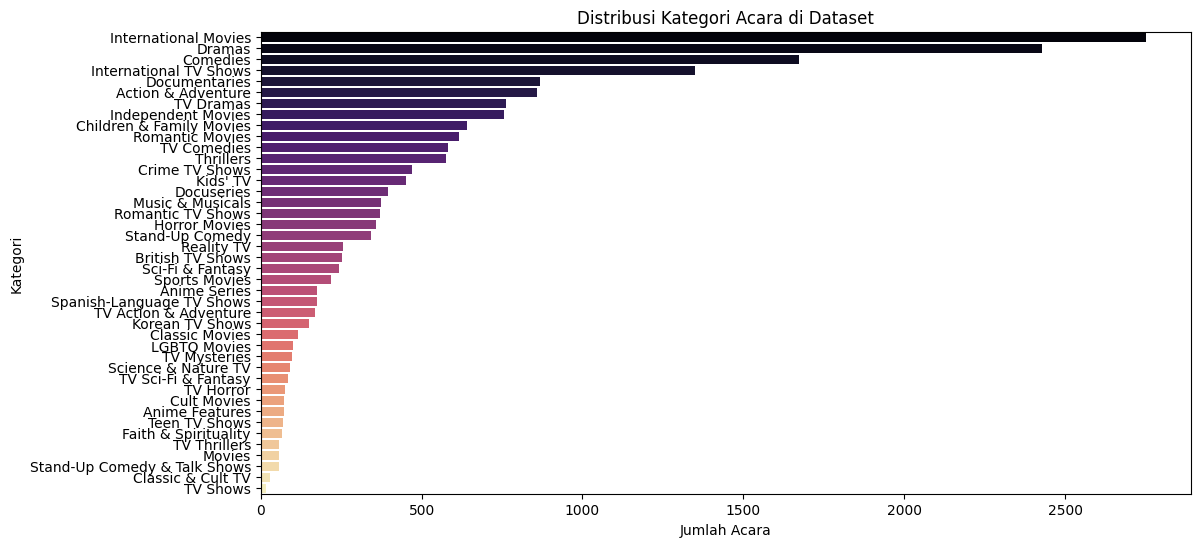

In [84]:
# Memisahkan kategori dan menghitung frekuensinya tanpa menggunakan Counter
category_list = acara_tv_imputasi['listed_in'].str.split(',').explode().str.strip()

# Menghitung jumlah kemunculan setiap kategori
category_df = category_list.value_counts().reset_index()
category_df.columns = ['Category', 'Count']

# Visualisasi distribusi kategori menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=category_df, x='Count', y='Category', palette='magma')
plt.xlabel("Jumlah Acara")
plt.ylabel("Kategori")
plt.title("Distribusi Kategori Acara di Dataset")
plt.show()


- Program ini menggunakan **WordCloud** dari library **wordcloud** untuk membuat visualisasi kosa kata dari kategori acara tv `listed_in` dalam dataset, serta **matplotlib** untuk menampilkan hasilnya dengan tujuan mengidentifikasi kata yang paling sering muncul dalam kategori acara.

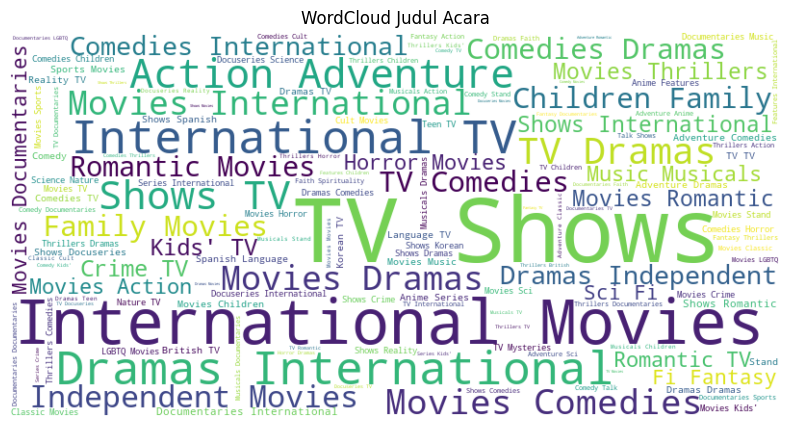

In [94]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(acara_tv_imputasi['listed_in'].dropna()))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Judul Acara")
plt.show()

Dari hasil visualisasi, diagram batang menunjukkan bahwa kategori acara TV yang paling banyak adalah **International Movies, Dramas, dan Comedies**, sedangkan WordCloud mengonfirmasi bahwa kata yang paling sering muncul dalam judul acara juga berkaitan dengan kategori tersebut.  

**Kesimpulan:** Mayoritas acara dalam dataset terdiri dari film dan serial bertema **Internasional, Drama, dan Komedi**, menunjukkan tren popularitas genre ini dalam koleksi acara yang dianalisis.

<h3>Kesimpulan dari EDA (Exploratory Data Analysis)</h3>

Program acara TV mengalami tren peningkatan dari waktu ke waktu, dengan jumlah acara TV terbanyak dirilis pada akhir 2010-an, sedangkan tahun-tahun awal televisi memiliki produksi yang sangat terbatas. Hal ini menunjukkan adanya perkembangan industri hiburan yang semakin pesat seiring dengan meningkatnya permintaan penonton serta kemajuan teknologi dalam produksi dan distribusi acara TV. Selain itu, jenis program acara TV yang ditayangkan juga sangat bervariasi sesuai dengan tahunnya, mencerminkan tren dan preferensi yang berkembang di kalangan penonton pada setiap era. Misalnya, pada tahun-tahun tertentu, acara realitas (reality show) mungkin lebih populer dibandingkan dengan drama atau dokumenter, sementara pada tahun lainnya, genre seperti fiksi ilmiah atau serial kriminal mungkin lebih diminati. Dengan adanya tren ini, industri televisi terus beradaptasi dengan selera penonton serta inovasi teknologi yang memungkinkan berbagai format acara baru untuk berkembang dan menarik lebih banyak pemirsa dari berbagai latar belakang dan generasi.